In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from keras.preprocessing import sequence
from tensorflow.keras import activations
from keras.models import Sequential
from keras.layers import Dense
import itertools 
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import tensorflow.keras as K
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load in batch split data

path = "/MyPath/"

X_train = np.load(path + "x_traing.npy")


X_test = np.load(path + "x_testg.npy")

print("X",X_train.shape,X_test.shape)

X (36000, 125, 125, 1) (12000, 125, 125, 1)


Text(0.5, 0, 'Samples')

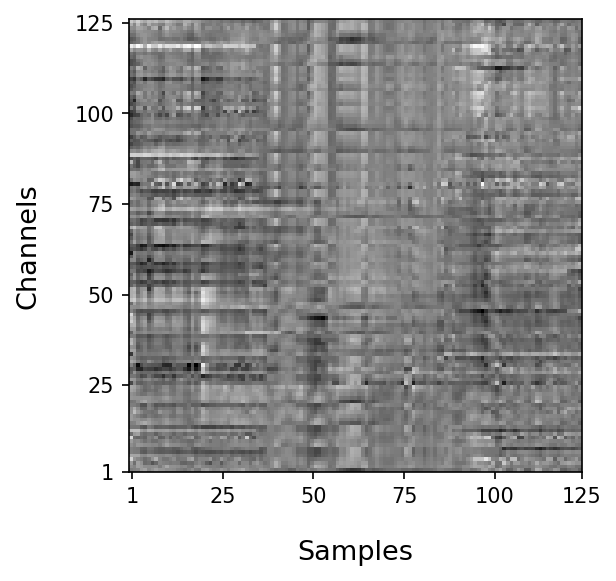

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

#Show example of grayscale input representation 

font = {'family': 'Verdana', 
        'color':  'black', 
        'size': 13, 
        } 

plt.figure(dpi=150)

rep1 = X_train[100]
rep1 = np.reshape(rep1, (125,125))

plt.yticks([0.5,25.5,50.5,75.5,100.5,124.5],['125','100','75','50','25','1'])
plt.xticks([0.5,25.5,50.5,75.5,100.5,124.5],['1','25','50','75','100','125'])
image = plt.imshow(rep1.T, cmap='Greys', interpolation='nearest')
plt.ylabel('Channels', fontdict=font, labelpad=16)
plt.xlabel('Samples', fontdict=font, labelpad=16)

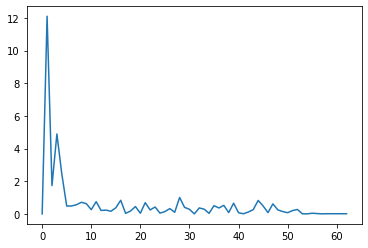

In [ ]:
#show example of periodogram of a specific channel
y = X_train[10,:,25]
y = np.squeeze(y, axis=1)

f, Pxx_den = signal.periodogram(y, fs=125)

plt.plot(Pxx_den)

In [ ]:
train_psd = []
test_psd = []

#First 10 examples
for i in range(10):
  x = []
  for j in range(125):
    y = X_train[i,:,j]
    y = np.squeeze(y, axis=1)

    f, Pxx_den = signal.periodogram(y, fs=125)
    #f, Pxx_den = signal.welch(y, fs=125, nperseg=125)
    x.append(Pxx_den)

  x = np.array(x)
  train_psd.append(x.T)

train_psd = np.array(train_psd)
train_psd = np.reshape(train_psd, (train_psd.shape[0], train_psd.shape[1], train_psd.shape[2], 1) )

(63, 125)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


(0.0, 63.0)

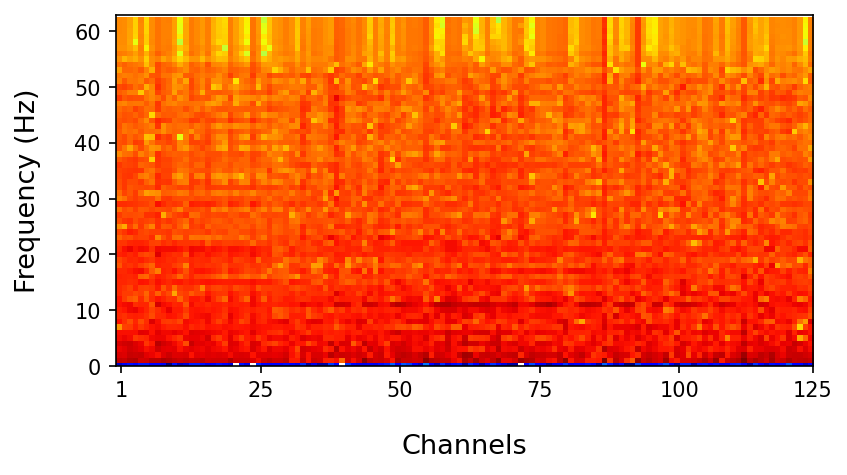

In [ ]:
#Show example of power spectral density input representation 
y = np.squeeze(train_psd[5], axis=2)
print(y.shape)
y = 20*np.log10(y)

plt.figure(dpi=150)
plt.imshow(y, cmap='jet')
plt.ylabel('Frequency (Hz)', fontdict=font, labelpad=16)
plt.xlabel('Channels', fontdict=font, labelpad=16)
plt.xticks([0.5,25.5,50.5,75.5,100.5,124.5],['1','25','50','75','100','125'])
plt.ylim([0, 63])